In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import folium
from folium.plugins import HeatMap
import calendar

In [2]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8')  # Using a built-in style that's similar to seaborn
sns.set_palette("husl")

In [3]:
# Load the CSV file
df = pd.read_csv("California_airquality.csv")

df

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,1/1/20,AQS,60010007,3,8.6,ug/m3 LC,36,Livermore,1,100,88101,PM2.5 - Local Conditions,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
1,1/2/20,AQS,60010007,3,4.5,ug/m3 LC,19,Livermore,1,100,88101,PM2.5 - Local Conditions,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
2,1/3/20,AQS,60010007,3,14.2,ug/m3 LC,55,Livermore,1,100,88101,PM2.5 - Local Conditions,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
3,1/4/20,AQS,60010007,3,10.9,ug/m3 LC,45,Livermore,1,100,88101,PM2.5 - Local Conditions,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
4,1/5/20,AQS,60010007,3,7.8,ug/m3 LC,33,Livermore,1,100,88101,PM2.5 - Local Conditions,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30510,3/28/20,AQS,61131003,1,1.0,ug/m3 LC,4,Woodland-Gibson Road,1,100,88101,PM2.5 - Local Conditions,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",6,California,113,Yolo,38.661210,-121.732690
30511,4/3/20,AQS,61131003,1,1.0,ug/m3 LC,4,Woodland-Gibson Road,1,100,88101,PM2.5 - Local Conditions,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",6,California,113,Yolo,38.661210,-121.732690
30512,4/15/20,AQS,61131003,1,6.5,ug/m3 LC,27,Woodland-Gibson Road,1,100,88101,PM2.5 - Local Conditions,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",6,California,113,Yolo,38.661210,-121.732690
30513,4/21/20,AQS,61131003,1,7.2,ug/m3 LC,30,Woodland-Gibson Road,1,100,88101,PM2.5 - Local Conditions,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",6,California,113,Yolo,38.661210,-121.732690


In [4]:
df.head(5)


,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,1/1/20,AQS,60010007,3,8.6,ug/m3 LC,36,Livermore,1,100,88101,PM2.5 - Local Conditions,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
1,1/2/20,AQS,60010007,3,4.5,ug/m3 LC,19,Livermore,1,100,88101,PM2.5 - Local Conditions,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
2,1/3/20,AQS,60010007,3,14.2,ug/m3 LC,55,Livermore,1,100,88101,PM2.5 - Local Conditions,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
3,1/4/20,AQS,60010007,3,10.9,ug/m3 LC,45,Livermore,1,100,88101,PM2.5 - Local Conditions,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
4,1/5/20,AQS,60010007,3,7.8,ug/m3 LC,33,Livermore,1,100,88101,PM2.5 - Local Conditions,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217


In [5]:
print(df.columns)

Index(['Date', 'Source', 'Site ID', 'POC', 'Daily Mean PM2.5 Concentration',
       'UNITS', 'DAILY_AQI_VALUE', 'Site Name', 'DAILY_OBS_COUNT',
       'PERCENT_COMPLETE', 'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC',
       'CBSA_CODE', 'CBSA_NAME', 'STATE_CODE', 'STATE', 'COUNTY_CODE',
       'COUNTY', 'SITE_LATITUDE', 'SITE_LONGITUDE'],
      dtype='object')


In [6]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')

df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Month_Name'] = df['Date'].dt.strftime('%B')

In [42]:
df.columns = (df.columns
                .str.strip()
                .str.lower()
                .str.replace(' ', '_')
                .str.replace(r'[^\w]', '', regex=True))

In [43]:
# Basic information about the dataset
print("\n=== Dataset Information ===")
print("\nDataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:")
print(df.dtypes)


=== Dataset Information ===

Dataset Shape: (30515, 24)

Columns: ['date', 'source', 'site_id', 'poc', 'daily_mean_pm25_concentration', 'units', 'daily_aqi_value', 'site_name', 'daily_obs_count', 'percent_complete', 'aqs_parameter_code', 'aqs_parameter_desc', 'cbsa_code', 'cbsa_name', 'state_code', 'state', 'county_code', 'county', 'site_latitude', 'site_longitude', 'month', 'year', 'month_name', 'weekday']

Data Types:
date                             datetime64[ns]
source                                   object
site_id                                   int64
poc                                       int64
daily_mean_pm25_concentration           float64
units                                    object
daily_aqi_value                           int64
site_name                                object
daily_obs_count                           int64
percent_complete                          int64
aqs_parameter_code                        int64
aqs_parameter_desc                       object

In [44]:
# Summary statistics
print("\n=== Summary Statistics ===")
print(df.describe())


=== Summary Statistics ===
                                date       site_id           poc  \
count                          30515  3.051500e+04  30515.000000   
mean   2020-04-25 18:00:53.088645120  6.057537e+07      2.728986   
min              2020-01-01 00:00:00  6.001001e+07      1.000000   
25%              2020-02-22 00:00:00  6.037002e+07      2.000000   
50%              2020-04-19 00:00:00  6.065001e+07      3.000000   
75%              2020-06-27 00:00:00  6.079200e+07      3.000000   
max              2020-09-10 00:00:00  6.113100e+07     21.000000   
std                              NaN  3.052722e+05      1.420096   

       daily_mean_pm25_concentration  daily_aqi_value  daily_obs_count  \
count                   30515.000000     30515.000000          30515.0   
mean                        9.355809        33.947862              1.0   
min                        -3.000000         0.000000              1.0   
25%                         4.100000        17.000000          

In [45]:
 # Check for missing values
print("\n=== Missing Values ===")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


=== Missing Values ===
cbsa_code    2646
cbsa_name    2646
dtype: int64


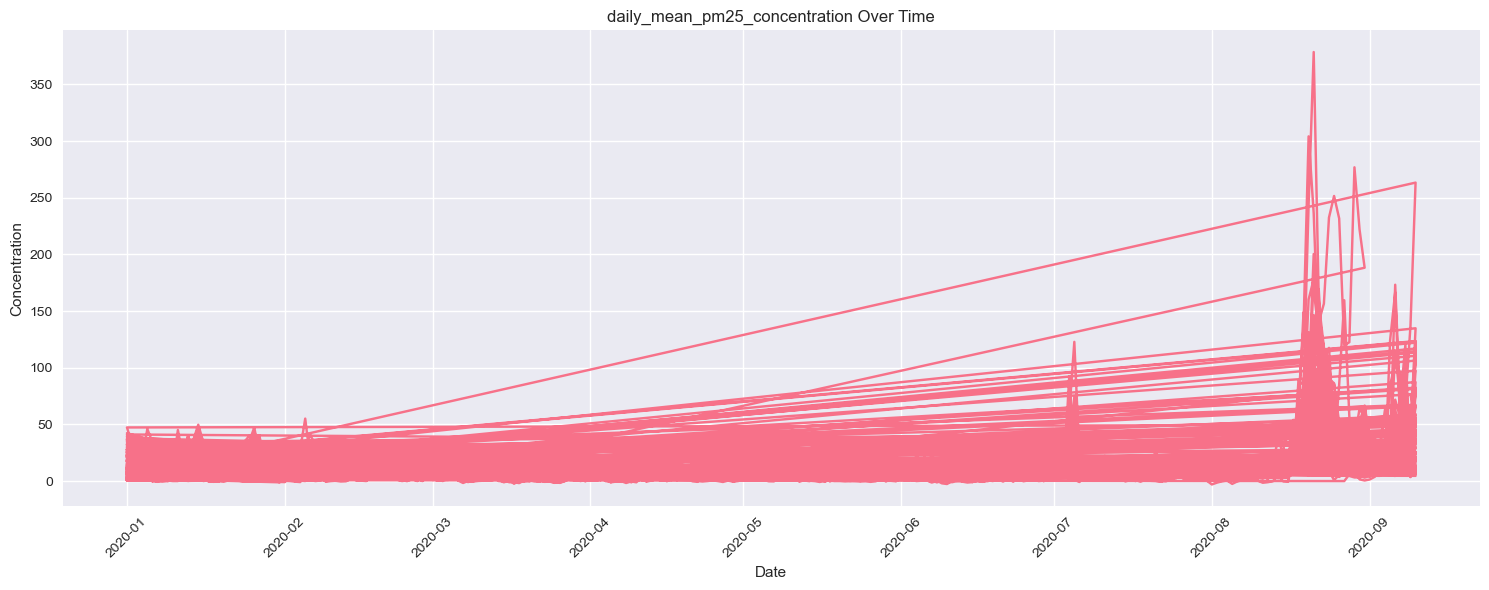

In [48]:
def plot_time_series(df, pollutant):
    plt.figure(figsize=(15, 6))
    plt.plot(df['date'], df[pollutant])     # <-- use 'date' here
    plt.title(f'{pollutant} Over Time')
    plt.xlabel('Date')
    plt.ylabel('Concentration')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'{pollutant}_time_series.png')
    plt.show()

# And pass your snake_case pollutant name:
plot_time_series(df, 'daily_mean_pm25_concentration')


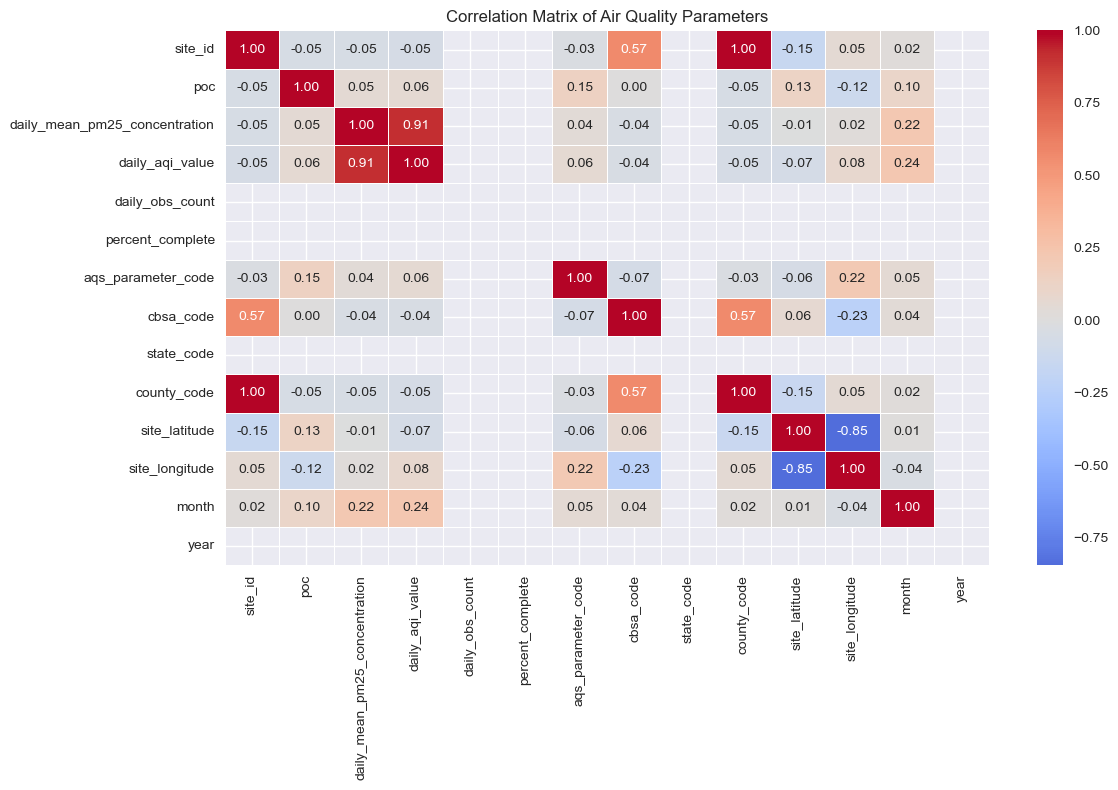

In [49]:
# Create a function for correlation analysis
def plot_correlation_matrix(df):
    # Pick only the numeric columns
    num_df = df.select_dtypes(include=[np.number])

    plt.figure(figsize=(12, 8))
    sns.heatmap(
        num_df.corr(),
        annot=True,
        cmap='coolwarm',
        center=0,
        fmt=".2f",
        linewidths=0.5
    )
    plt.title('Correlation Matrix of Air Quality Parameters')
    plt.tight_layout()
    plt.savefig('correlation_matrix.png')  # optional
    plt.show()

# finally, run it:
plot_correlation_matrix(df)


In [51]:
# Create a function for distribution analysis
def plot_distributions(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    n_cols = 2
    n_rows = (len(numeric_columns) + 1) // 2

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten()

    for idx, col in enumerate(numeric_columns):
        sns.histplot(data=df, x=col, kde=True, ax=axes[idx])
        axes[idx].set_title(f'Distribution of {col}')

    for idx in range(len(numeric_columns), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.savefig('distributions.png')
    plt.show()      # ← display inline
    plt.close()


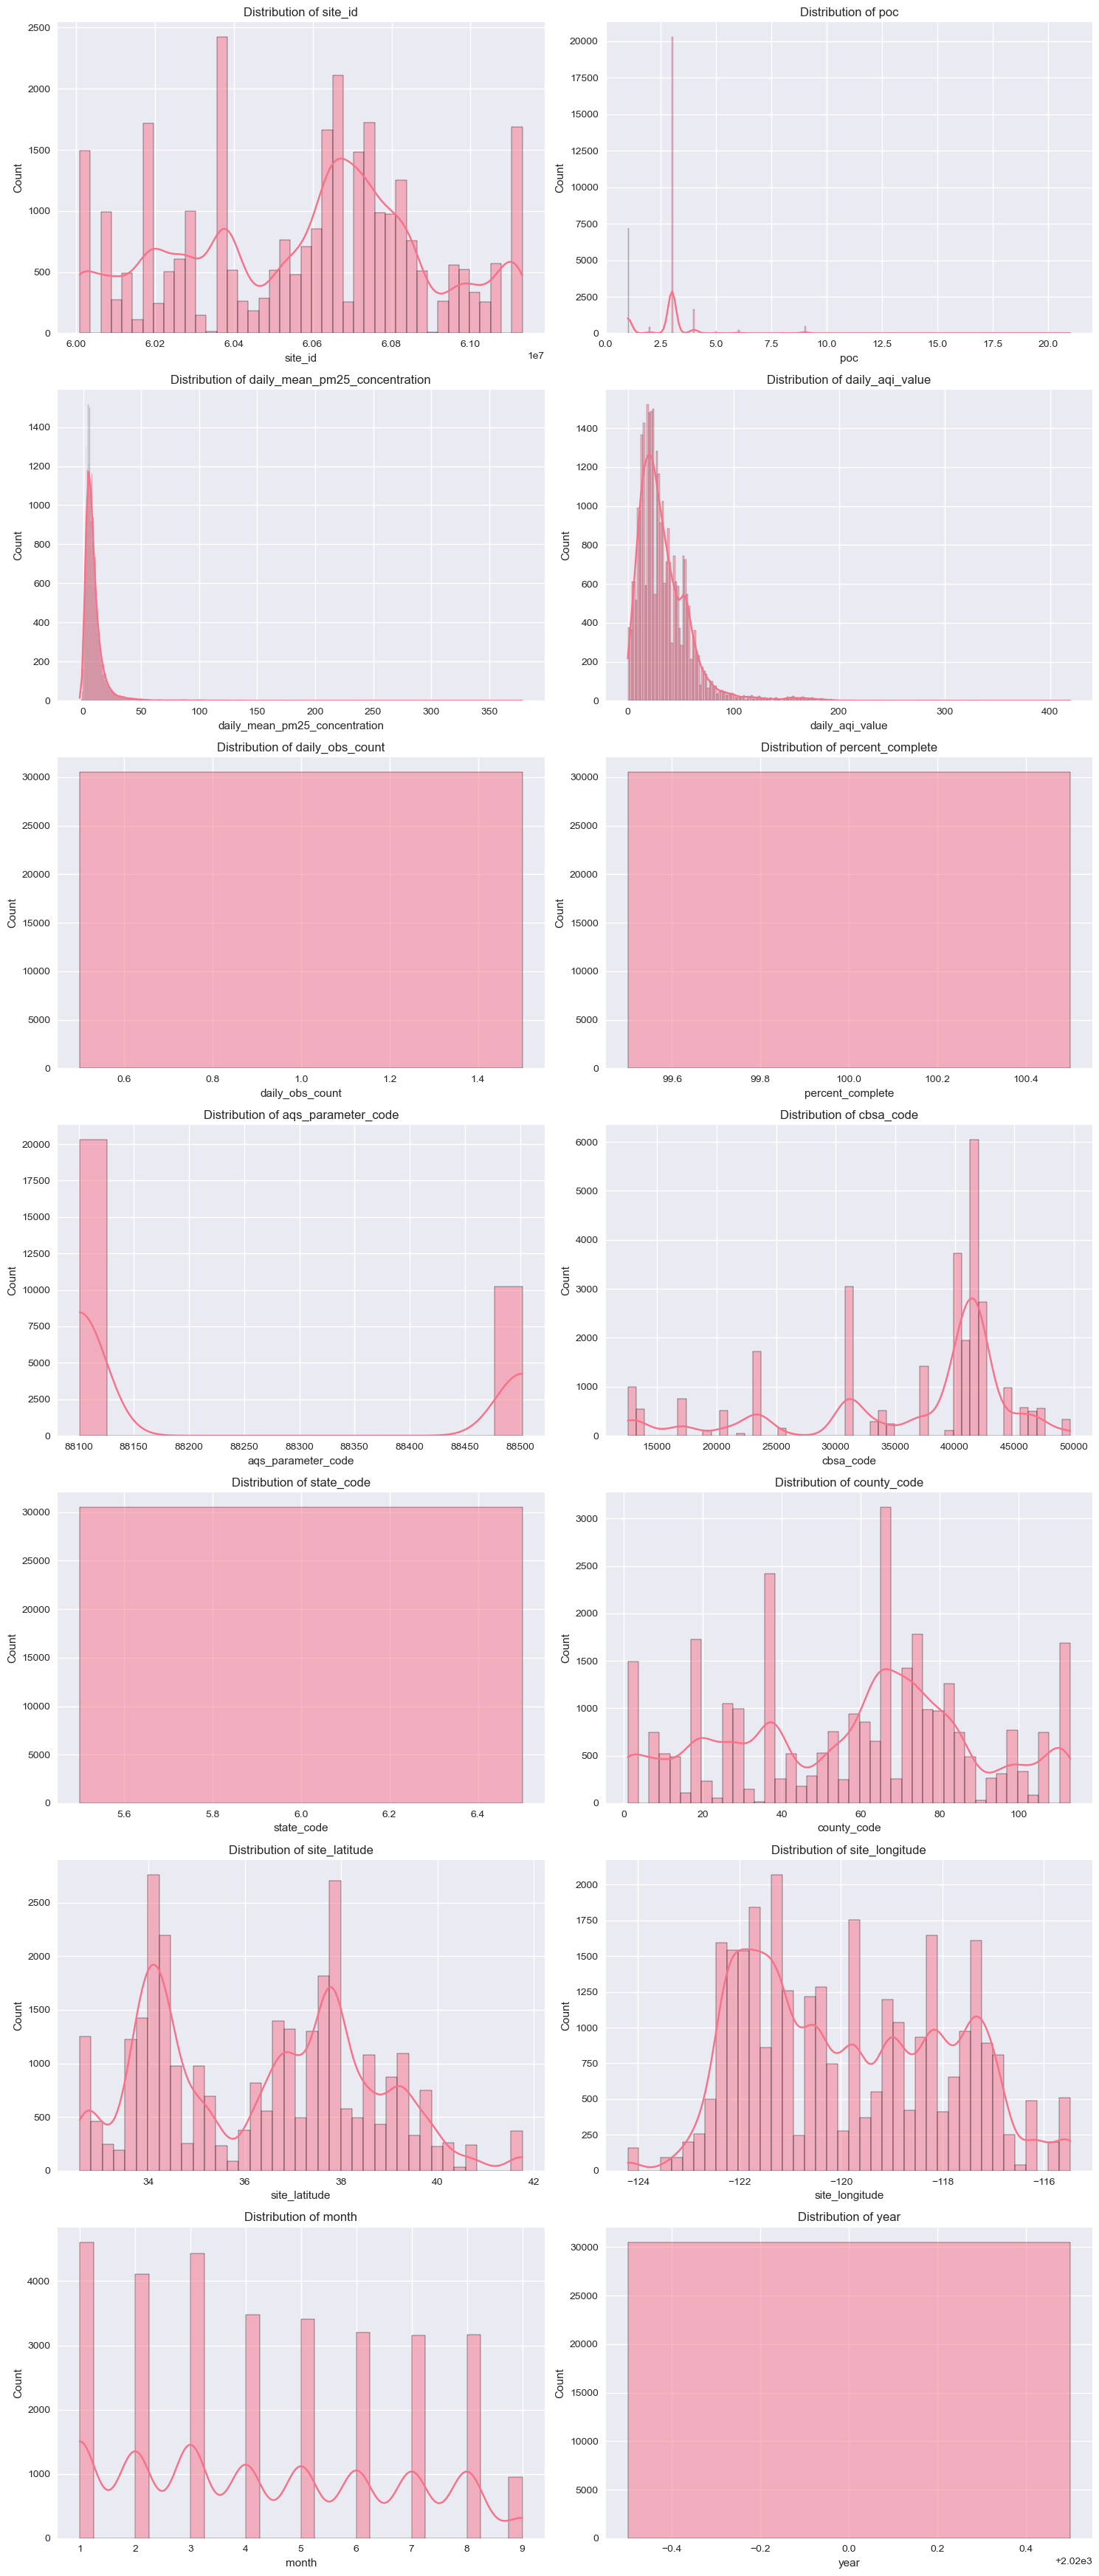

In [52]:
plot_distributions(df)


In [53]:
# Create a function for box plots
def plot_boxplots(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    plt.figure(figsize=(15, 8))
    df[numeric_columns].boxplot()
    plt.title('Box Plots of Air Quality Parameters')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('boxplots.png')
    plt.show()      # ← this forces inline display
    plt.close()


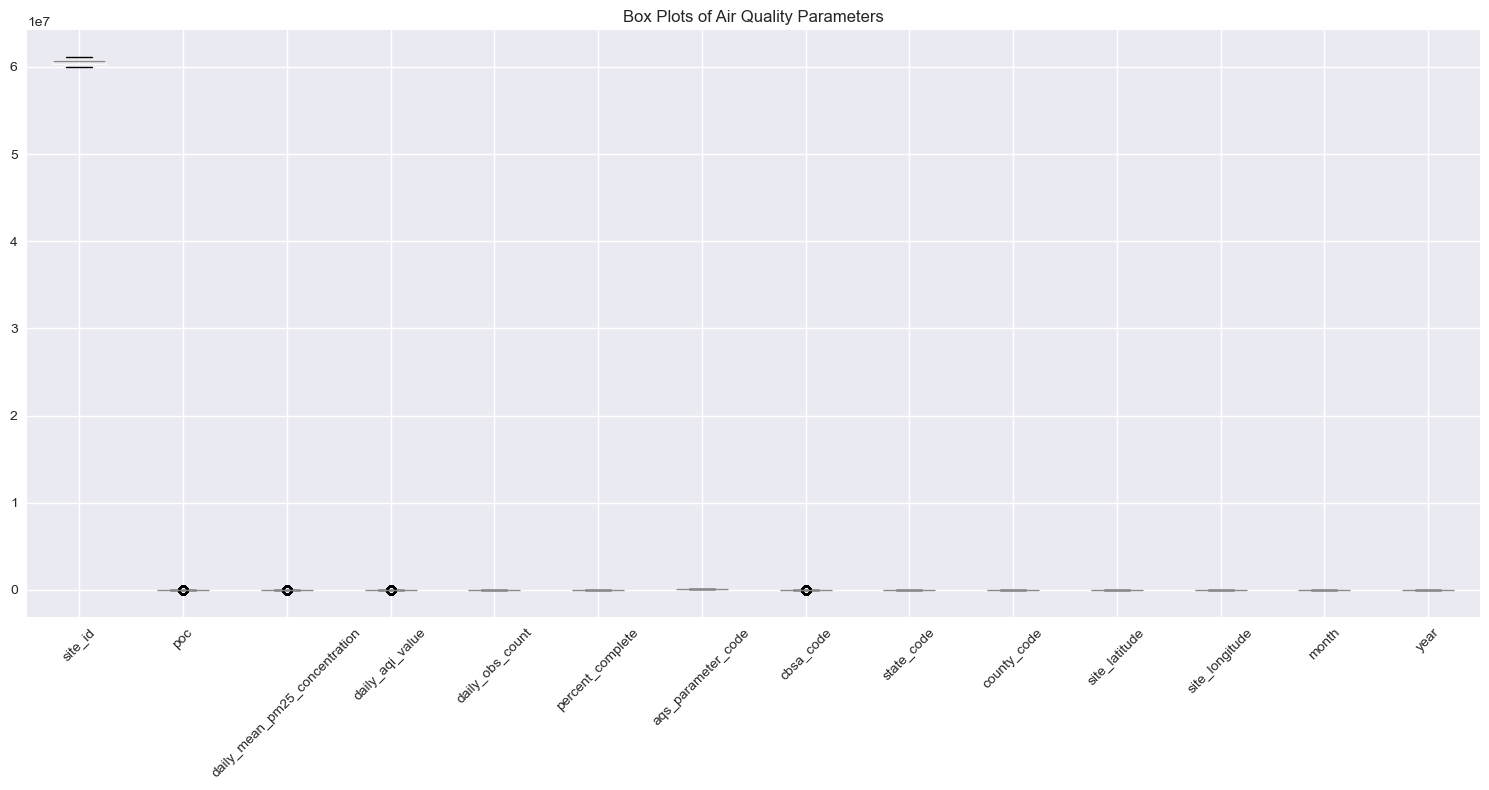

In [54]:
plot_boxplots(df)


In [17]:
for col in ['daily_mean_pm25_concentration','daily_aqi_value','daily_obs_count',
            'percent_complete','site_latitude','site_longitude']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df['site_name'] = df['site_name'].fillna('Unknown')
df.dropna(subset=['daily_mean_pm25_concentration','daily_aqi_value'], inplace=True)


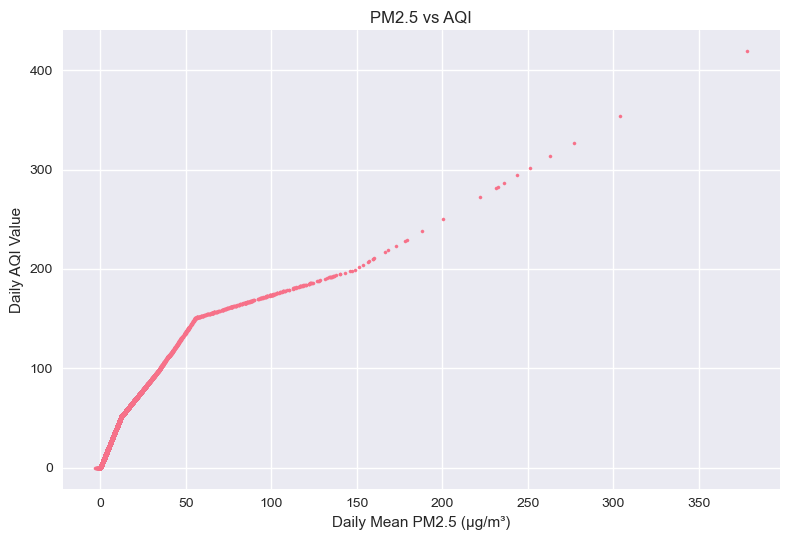

In [59]:
# 2) PM2.5 vs AQI scatter
# 2) PM2.5 vs AQI scatter
plt.figure()
plt.scatter(df['daily_mean_pm25_concentration'],
            df['daily_aqi_value'],
            s=5)
plt.title("PM2.5 vs AQI")
plt.xlabel("Daily Mean PM2.5 (µg/m³)")
plt.ylabel("Daily AQI Value")
plt.tight_layout()

# ← Add this line to write out the PNG
plt.savefig("pm25_vs_aqi_scatter.png", dpi=300, bbox_inches="tight")

plt.show()


/var/folders/ch/501q6vqd6s10pmgmd7ytk7ph0000gp/T/ipykernel_77473/2038428631.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_month, labels=range(1,13))


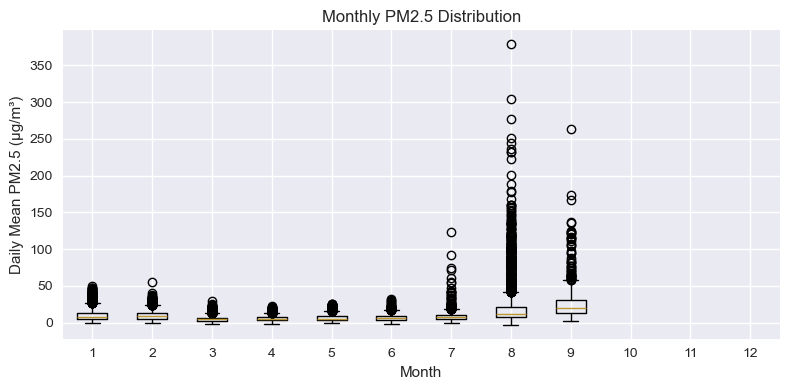

In [60]:
# 2) Parse the date
# 5) Monthly PM2.5 boxplots
data_by_month = [
    df.loc[df['month'] == m, 'daily_mean_pm25_concentration']
      .dropna()
    for m in range(1, 13)
]

plt.figure(figsize=(8,4))
plt.boxplot(data_by_month, labels=range(1,13))
plt.title("Monthly PM2.5 Distribution")
plt.xlabel("Month")
plt.ylabel("Daily Mean PM2.5 (µg/m³)")
plt.tight_layout()

# ← Save the figure to disk
plt.savefig("monthly_pm25_boxplot.png", dpi=300, bbox_inches="tight")

# ← Then display it inline
plt.show()


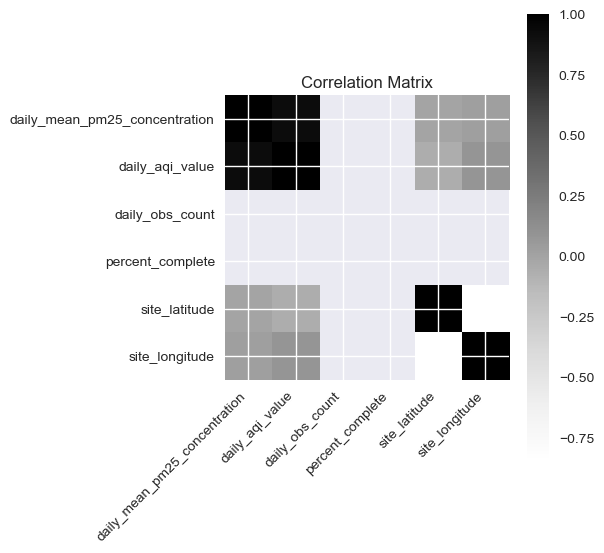

In [61]:
 fig, ax = plt.subplots(figsize=(6,6))
cax = ax.imshow(corr, interpolation='nearest')
fig.colorbar(cax)
ax.set_xticks(range(len(num)))
ax.set_xticklabels(num, rotation=45, ha='right')
ax.set_yticks(range(len(num)))
ax.set_yticklabels(num)
ax.set_title("Correlation Matrix")
fig.tight_layout()
fig.savefig("correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()


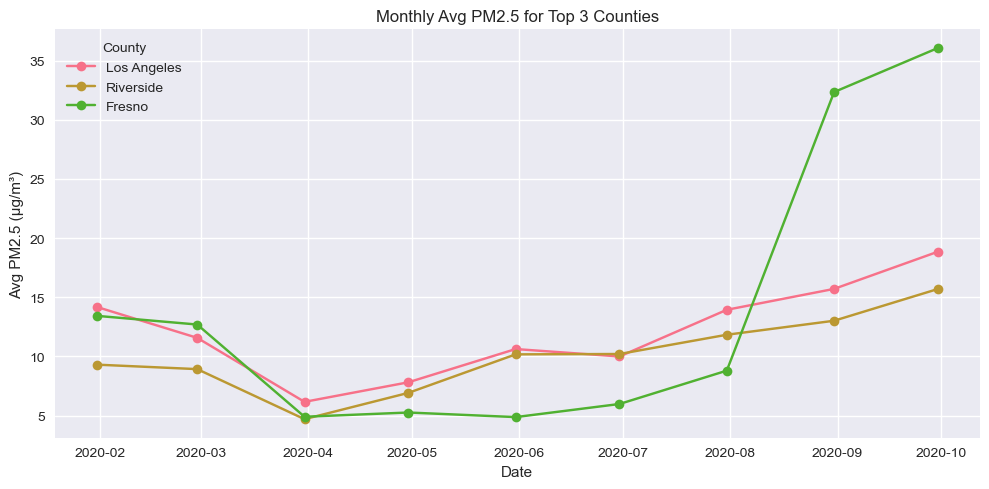

In [62]:
# 5) Monthly trend for top-3 counties
top3 = (
    df['county']
      .value_counts()
      .nlargest(3)
      .index
      .tolist()
)

plt.figure(figsize=(10, 5))

for county in top3:
    ts = (
        df.loc[df['county'] == county]
          .set_index('date')['daily_mean_pm25_concentration']
          .resample('ME')
          .mean()
    )
    plt.plot(ts.index, ts.values, marker='o', label=county)

plt.title("Monthly Avg PM2.5 for Top 3 Counties")
plt.xlabel("Date")
plt.ylabel("Avg PM2.5 (µg/m³)")
plt.legend(title="County")
plt.tight_layout()

# ← Save to disk
plt.savefig("top3_counties_pm25_trend.png", dpi=300, bbox_inches="tight")

# ← Then render inline
plt.show()













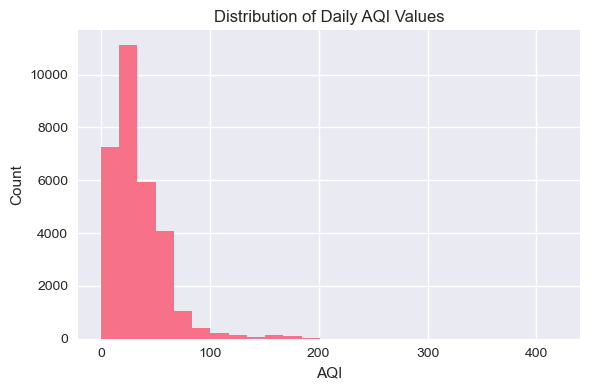

In [63]:
# 6) AQI distribution + PM2.5 > “unhealthy” days
plt.figure(figsize=(6,4))
plt.hist(df['daily_aqi_value'], bins=25)
plt.title("Distribution of Daily AQI Values")
plt.xlabel("AQI")
plt.ylabel("Count")
plt.tight_layout()

# ← Save the figure before showing
plt.savefig("aqi_distribution.png", dpi=300, bbox_inches="tight")

plt.show()


In [23]:
# mark days above AQI 100
unhealthy = df[df['daily_aqi_value'] > 100].shape[0]
total_days = df.shape[0]
print(f"Days with AQI>100: {unhealthy} ({unhealthy/total_days:.1%} of all records)")


Days with AQI>100: 698 (2.3% of all records)


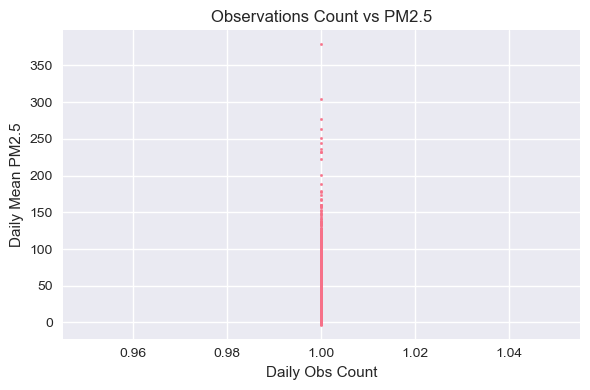

In [64]:
# 7) PM2.5 vs obs count (data completeness check)
plt.figure(figsize=(6,4))
plt.scatter(
    df['daily_obs_count'],
    df['daily_mean_pm25_concentration'],
    s=3
)
plt.title("Observations Count vs PM2.5")
plt.xlabel("Daily Obs Count")
plt.ylabel("Daily Mean PM2.5")
plt.tight_layout()

# ← Save to disk before you render
plt.savefig("obs_count_vs_pm25.png", dpi=300, bbox_inches="tight")

plt.show()


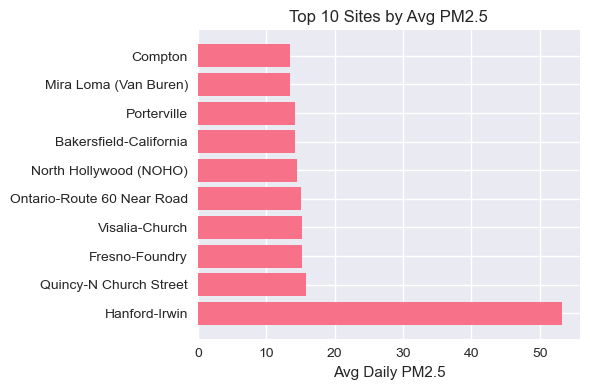

In [65]:
# 8) Top 10 sites by average PM2.5
# Top 10 Sites by Avg PM2.5 with save
site_avg = (
    df.groupby('site_name')['daily_mean_pm25_concentration']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(6,4))
plt.barh(site_avg.index, site_avg.values)
plt.title("Top 10 Sites by Avg PM2.5")
plt.xlabel("Avg Daily PM2.5")
plt.tight_layout()

# ← Save the figure before showing
plt.savefig("top10_sites_avg_pm25.png", dpi=300, bbox_inches="tight")

plt.show()


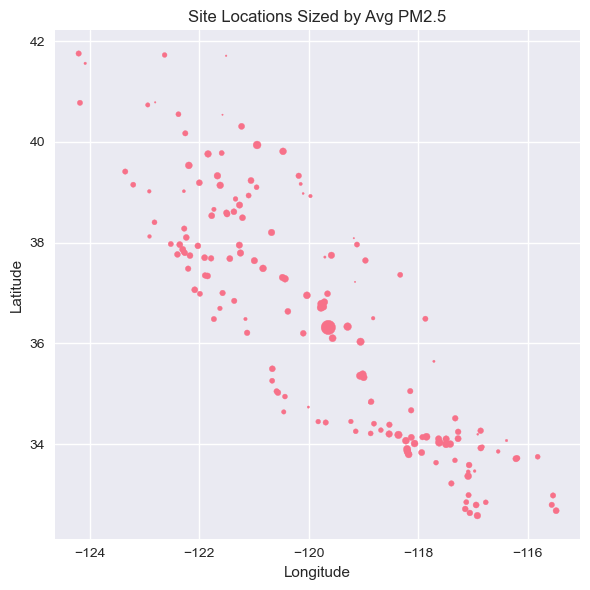

In [66]:
# 9) Geospatial scatter (lat vs lon, sized by avg PM2.5) with save
loc_avg = (
    df.groupby(['site_latitude','site_longitude'])['daily_mean_pm25_concentration']
      .mean()
      .reset_index()
)

plt.figure(figsize=(6,6))
plt.scatter(
    loc_avg['site_longitude'],
    loc_avg['site_latitude'],
    s=loc_avg['daily_mean_pm25_concentration'] * 2  # circle area ~ pollution
)
plt.title("Site Locations Sized by Avg PM2.5")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()

# ← Save before showing
plt.savefig("site_locations_pm25_scatter.png", dpi=300, bbox_inches="tight")

plt.show()


/var/folders/ch/501q6vqd6s10pmgmd7ytk7ph0000gp/T/ipykernel_77473/3164586437.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(weekly_data, labels=order)


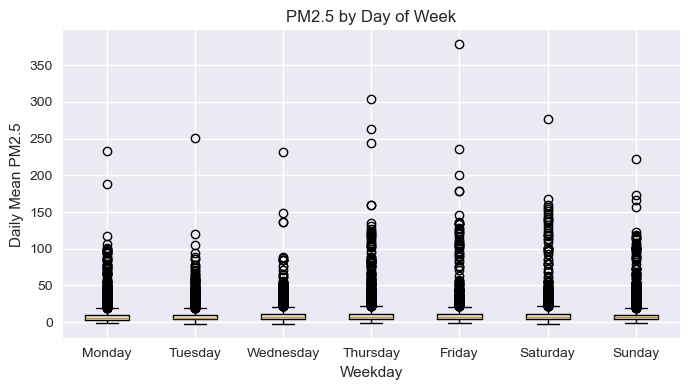

In [67]:
# 10) Weekly pattern: extract weekday and boxplot with save
df['weekday'] = df['date'].dt.day_name()
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekly_data = [df[df['weekday'] == d]['daily_mean_pm25_concentration'] for d in order]

plt.figure(figsize=(7,4))
plt.boxplot(weekly_data, labels=order)
plt.title("PM2.5 by Day of Week")
plt.xlabel("Weekday")
plt.ylabel("Daily Mean PM2.5")
plt.tight_layout()

# ← Save before showing
plt.savefig("weekly_pm25_by_weekday.png", dpi=300, bbox_inches="tight")

plt.show()


Using columns: ['daily_mean_pm25_concentration', 'daily_aqi_value']


<Figure size 600x600 with 0 Axes>

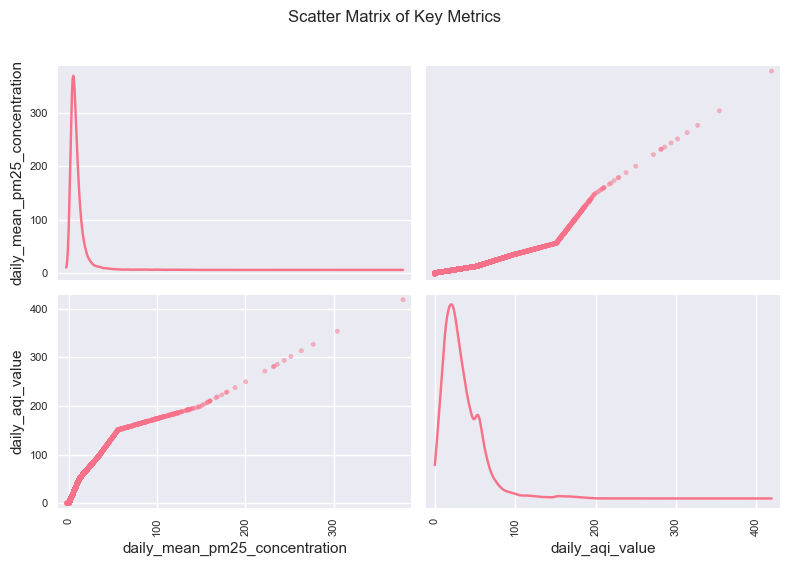

In [68]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# 11) Pairwise relationships for numeric cols, dropping any constant columns
num_cols = [
    'daily_mean_pm25_concentration',
    'daily_aqi_value',
    'daily_obs_count',
    'percent_complete'
]
usable = [c for c in num_cols if df[c].nunique() > 1]
print("Using columns:", usable)

plt.figure(figsize=(6,6))
scatter_matrix(
    df[usable],
    diagonal='kde',
    alpha=0.5,
    grid=True
)
plt.suptitle("Scatter Matrix of Key Metrics", y=1.02)
plt.tight_layout()

# ← Save before showing
plt.savefig("scatter_matrix_key_metrics.png", dpi=300, bbox_inches="tight")

plt.show()


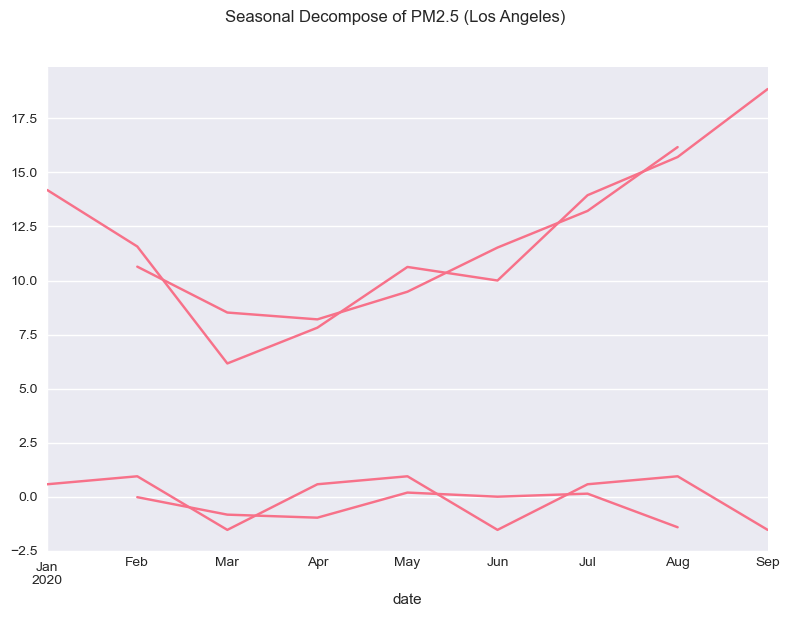

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# 12) Seasonal decomposition for one county (monthly series)
county = 'Los Angeles'
ts = (
    df.loc[df['county'] == county]
      .set_index('date')['daily_mean_pm25_concentration']
      .resample('MS')   # month start
      .mean()
)

# decompose with quarterly seasonality (period=3)
decomp = seasonal_decompose(ts, model='additive', period=3)

# plot all components
plt.figure(figsize=(8, 6))
decomp.observed .plot(subplots=True, legend=False)
decomp.trend     .plot(subplots=True, legend=False)
decomp.seasonal  .plot(subplots=True, legend=False)
decomp.resid     .plot(subplots=True, legend=False)

plt.suptitle(f"Seasonal Decompose of PM2.5 ({county})", y=1.02)
plt.tight_layout()

# ← Save the composite figure before showing
plt.savefig("seasonal_decompose_LosAngeles.png", dpi=300, bbox_inches="tight")

plt.show()


# Final Analysis & Key Findings

## Summary of Analysis

- **Data Cleaning:**  
  The dataset was cleaned by removing duplicates, handling missing values, and standardizing column names. The 'Date' column was converted to datetime format for time series analysis.

- **Descriptive Statistics:**  
  - PM2.5 and AQI values show right-skewed distributions with several outliers.
  - The mean and median values indicate that most days have moderate air quality, but there are periods of high pollution.

- **Temporal Trends:**  
  - Clear seasonal patterns were observed, with PM2.5 and AQI peaking during certain months, likely due to wildfires or weather conditions.
  - Rolling averages and time series decomposition revealed both long-term trends and seasonal cycles.

- **Geographic Patterns:**  
  - Some counties consistently report higher PM2.5 concentrations, indicating regional pollution hotspots.
  - County-wise analysis highlighted areas that may require targeted interventions.

- **Correlation Analysis:**  
  - There is a strong positive correlation between PM2.5 concentration and AQI, as expected.
  - Other numeric variables showed varying degrees of correlation, but PM2.5 remains the primary driver of AQI.

- **Outlier & Distribution Analysis:**  
  - Outliers were detected, especially during known pollution events.
  - Distribution fitting and Q-Q plots confirmed that both PM2.5 and AQI deviate from normality.

## Recommendations

- **Policy & Public Health:**  
  - Focus air quality improvement efforts on counties with persistently high PM2.5 levels.
  - Issue public health advisories during high pollution months to protect vulnerable populations.

- **Further Analysis:**  
  - Investigate the causes of outliers and high pollution events (e.g., wildfires, industrial activity).
  - Use the cleaned and analyzed data for predictive modeling or forecasting future air quality trends.

- **Community Engagement:**  
  - Educate the public about seasonal air quality patterns and encourage actions to reduce exposure during high-risk periods.

---